In [1]:
from fbprophet import Prophet
import pandas as pd 
import matplotlib.pyplot as plt
import calendar

In [ ]:
fecha = pd.Timestamp('2018-2-15')

datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col=0)
datos.index = pd.to_datetime(datos.index, format='%d/%m/%Y')
data = datos[datos.index <= fecha].copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

m = Prophet()
m.fit(data)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.loc[forecast['yhat']<0, 'yhat'] = 0
forecast.loc[forecast['yhat_lower']<0, 'yhat_lower'] = 0
forecast.loc[forecast['yhat_upper']<0, 'yhat_upper'] = 0

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [ ]:
fecha = pd.Timestamp('2018-2-15')

datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col=0)
datos.index = pd.to_datetime(datos.index, format='%d/%m/%Y')
data = datos[datos.index <= fecha].copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

festivos = pd.read_table('festivos.csv',sep=';',decimal = ',', encoding='latin-1')
festivos['ds'] = pd.to_datetime(festivos['ds'], format='%d/%m/%Y')

m = Prophet(holidays=festivos)
m.fit(data)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.loc[forecast['yhat']<0, 'yhat'] = 0
forecast.loc[forecast['yhat_lower']<0, 'yhat_lower'] = 0
forecast.loc[forecast['yhat_upper']<0, 'yhat_upper'] = 0

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [ ]:
fecha = pd.Timestamp('2018-2-15')

datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col=0)
datos.index = pd.to_datetime(datos.index, format='%d/%m/%Y')
data = datos[datos.index <= fecha].copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

festivos = pd.read_table('festivos.csv',sep=';',decimal = ',', encoding='latin-1')
festivos['ds'] = pd.to_datetime(festivos['ds'], format='%d/%m/%Y')

PIB = pd.read_table('PIB.csv',sep=';',decimal = ',',index_col=0)
PIB.index = pd.to_datetime(PIB.index, format='%d/%m/%Y')
PIB_antes = PIB[PIB.index<=fecha].copy()
PIB_pred = pd.read_table('PIB prediccion.csv',sep=';',decimal = ',',index_col=0)
PIB_pred.index = pd.to_datetime(PIB_pred.index, format='%d/%m/%Y')
PIB_despues = PIB_pred[PIB_pred.index>fecha].copy()
economia_PIB = pd.concat([PIB_antes, PIB_despues])

data_with_regressors=data.join(economia_PIB)

m = Prophet(holidays=festivos)
m.add_regressor('anual', prior_scale=0.5, mode='multiplicative')
m.add_regressor('trimestral', prior_scale=0.5, mode='multiplicative')
m.fit(data_with_regressors)

future = economia_PIB.copy()
future.index.name = 'ds'
future = future.reset_index()

forecast = m.predict(future)
forecast.loc[forecast['yhat']<0, 'yhat'] = 0
forecast.loc[forecast['yhat_lower']<0, 'yhat_lower'] = 0
forecast.loc[forecast['yhat_upper']<0, 'yhat_upper'] = 0

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [ ]:
fecha = pd.Timestamp('2018-2-15')

datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col=0)
datos.index = pd.to_datetime(datos.index, format='%d/%m/%Y')
data = datos[datos.index <= fecha].copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'ASPIRADO']])
data.columns = ['ds','y']

festivos = pd.read_table('festivos.csv',sep=';',decimal = ',', encoding='latin-1')
festivos['ds'] = pd.to_datetime(festivos['ds'], format='%d/%m/%Y')

PIB = pd.read_table('PIB.csv',sep=';',decimal = ',',index_col=0)
PIB.index = pd.to_datetime(PIB.index, format='%d/%m/%Y')
PIB_antes = PIB[PIB.index<=fecha].copy()
PIB_pred = pd.read_table('PIB prediccion.csv',sep=';',decimal = ',',index_col=0)
PIB_pred.index = pd.to_datetime(PIB_pred.index, format='%d/%m/%Y')
PIB_despues = PIB_pred[PIB_pred.index>fecha].copy()
economia_PIB = pd.concat([PIB_antes, PIB_despues])

empleado = pd.DataFrame(datos[['EMPLEO']])

regressors=economia_PIB.join(empleado)
data_with_regressors=data.join(regressors)

m = Prophet(holidays=festivos)
m.add_regressor('anual', prior_scale=0.5, mode='multiplicative')
m.add_regressor('trimestral', prior_scale=0.5, mode='multiplicative')
m.add_regressor('EMPLEO', prior_scale=0.5, mode='multiplicative')
m.fit(data_with_regressors)

future = regressors.copy()
future.index.name = 'ds'
future = future.reset_index()
future['EMPLEO'] = future['EMPLEO'].fillna(2)

forecast = m.predict(future)
forecast.loc[forecast['yhat']<0, 'yhat'] = 0
forecast.loc[forecast['yhat_lower']<0, 'yhat_lower'] = 0
forecast.loc[forecast['yhat_upper']<0, 'yhat_upper'] = 0

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [ ]:
fecha = pd.Timestamp('2018-2-15')

datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col=0)
datos.index = pd.to_datetime(datos.index, format='%d/%m/%Y')
data = datos[datos.index <= fecha].copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

festivos = pd.read_table('festivos.csv',sep=';',decimal = ',', encoding='latin-1')
festivos['ds'] = pd.to_datetime(festivos['ds'], format='%d/%m/%Y')

PIB = pd.read_table('PIB.csv',sep=';',decimal = ',',index_col=0)
PIB.index = pd.to_datetime(PIB.index, format='%d/%m/%Y')
PIB_antes = PIB[PIB.index<=fecha].copy()
PIB_pred = pd.read_table('PIB prediccion.csv',sep=';',decimal = ',',index_col=0)
PIB_pred.index = pd.to_datetime(PIB_pred.index, format='%d/%m/%Y')
PIB_despues = PIB_pred[PIB_pred.index>fecha].copy()
economia_PIB = pd.concat([PIB_antes, PIB_despues])

empleado = pd.DataFrame(datos[['EMPLEO']])

clima = pd.read_table('Clima.csv', sep=';', decimal = ',', index_col=0)
clima.index = pd.to_datetime(clima.index, format='%d/%m/%Y')
clima = pd.DataFrame(clima[['sol','tmin','tmax','prec']])
clima = clima.interpolate(method = 'linear')
clima_antes = clima[clima.index<=fecha].copy()
clima_pred = pd.read_table('Clima prediccion.csv', sep=';', decimal = ',', index_col=0)
clima_pred.index = pd.to_datetime(clima_pred.index, format='%d/%m/%Y')
clima_despues = clima_pred[clima_pred.index>fecha].copy()
climatologia = pd.concat([clima_antes, clima_despues])

regressors = economia_PIB.join(empleado)
regressors = regressors.join(climatologia)
data_with_regressors = data.join(regressors)

m = Prophet(holidays=festivos)
m.add_regressor('anual', prior_scale=0.5, mode='multiplicative')
m.add_regressor('trimestral', prior_scale=0.5, mode='multiplicative')
m.add_regressor('EMPLEO', prior_scale=0.5, mode='multiplicative')
m.add_regressor('sol', prior_scale=0.5, mode='multiplicative')
m.add_regressor('tmin', prior_scale=0.5, mode='multiplicative')
m.add_regressor('tmax', prior_scale=0.5, mode='multiplicative')
m.add_regressor('prec', prior_scale=0.5, mode='multiplicative')
m.fit(data_with_regressors)

future = regressors.copy()
future.index.name = 'ds'
future = future.reset_index()
future['EMPLEO'] = future['EMPLEO'].fillna(2)

forecast = m.predict(future)

forecast.loc[forecast['yhat']<0, 'yhat'] = 0
forecast.loc[forecast['yhat_lower']<0, 'yhat_lower'] = 0
forecast.loc[forecast['yhat_upper']<0, 'yhat_upper'] = 0

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [113]:

def modelo_prophet(data,fecha, season, periodo, furier, modo):
    festivos = pd.read_table('festivos.csv',sep=';',decimal=',',encoding='latin-1')
    festivos['ds'] = pd.to_datetime(festivos['ds'], format = '%d/%m/%Y')
    
    PIB = pd.read_table('PIB.csv',sep = ';',decimal = ',',index_col=0)
    PIB.index = pd.to_datetime(PIB.index, format = '%d/%m/%Y')
    PIB_antes = PIB[PIB.index <= fecha].copy()
    PIB_pred = pd.read_table('PIB prediccion.csv',sep=';',decimal = ',',index_col=0)
    PIB_pred.index = pd.to_datetime(PIB_pred.index, format = '%d/%m/%Y')
    PIB_despues = PIB_pred[PIB_pred.index>fecha].copy()
    economia_PIB = pd.concat([PIB_antes, PIB_despues])
    
    empleado = pd.DataFrame(datos[['EMPLEO']])
    
    clima = pd.read_table('Clima.csv', sep = ';', decimal = ',', index_col=0)
    clima.index = pd.to_datetime(clima.index, format='%d/%m/%Y')
    clima = pd.DataFrame(clima[['sol','tmin','tmax','prec']])
    clima = clima.interpolate(method = 'linear')
    clima_antes = clima[clima.index <= fecha].copy()
    clima_pred = pd.read_table('Clima prediccion.csv',sep=';',decimal=',',index_col=0)
    clima_pred.index = pd.to_datetime(clima_pred.index, format = '%d/%m/%Y')
    clima_despues = clima_pred[clima_pred.index > fecha].copy()
    climatologia = pd.concat([clima_antes, clima_despues])
    
    regressors = economia_PIB.join(empleado)
    regressors = regressors.join(climatologia)
    data_with_regressors = data.join(regressors)
    
    m = Prophet(holidays = festivos, seasonality_mode = 'multiplicative', yearly_seasonality=20) #mcmc_samples=300)
    m.add_regressor('anual', prior_scale = 0.5, mode = 'multiplicative')
    m.add_regressor('trimestral', prior_scale = 0.5, mode = 'multiplicative')
    m.add_regressor('EMPLEO', prior_scale = 0.5, mode = 'multiplicative')
    m.add_regressor('sol', prior_scale = 0.5, mode = 'additive')
    m.add_regressor('tmin', prior_scale = 0.5, mode = 'additive')
    m.add_regressor('tmax', prior_scale = 0.5, mode = 'additive')
    m.add_regressor('prec', prior_scale = 0.5, mode = 'additive')
    if season: 
        for c in range(0,len(periodo)):
            m.add_seasonality('periodo'+str(c), period=periodo[c], fourier_order=furier[c], mode=modo[c])
    m.fit(data_with_regressors)
    
    future = regressors.copy()
    future.index.name = 'ds'
    future = future.reset_index()
    future['EMPLEO'] = future['EMPLEO'].fillna(2)
    forecast = m.predict(future)
    forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
    forecast.loc[forecast['yhat_lower'] < 0, 'yhat_lower'] = 0
    forecast.loc[forecast['yhat_upper'] < 0, 'yhat_upper'] = 0
    
    return m, forecast

def modelo_TFM(data,fecha, season, periodo, furier,modo):
    m, forecast = modelo_prophet(data,fecha, season, periodo, furier, modo)
    serie_anterior = data[data['ds'] <= fecha][['ds', 'y']]
    nueva_serie = forecast[forecast['ds'] > fecha][['ds', 'yhat']]
    nueva_serie.rename(columns = {'yhat':'y'}, inplace = True)
    serie = pd.concat((serie_anterior, nueva_serie))
    serie['FECHA'] = pd.to_datetime(serie['ds'], format = '%d/%m/%Y')
    serie.index = serie['FECHA']
    serie = pd.DataFrame(serie[['ds', 'y']])
    return m, forecast, round(serie[serie['ds'].dt.year == fecha.year]['y'].sum(),2)

In [3]:
def modelo_inicial(data,fecha_estudio):
    año_estudio=fecha_estudio.year
    mes_estudio=fecha_estudio.month
    dia_estudio=fecha_estudio.day
    
#     display(data)
    datos_mes = data.groupby(pd.Grouper(freq='M')).sum()
#     display(datos_mes)
    datos_base = datos_mes.reset_index()
    datos_base = datos_base[(datos_base['FECHA'].dt.year < año_estudio)]
    datos_base['año'] = datos_base['FECHA'].dt.year
    datos_base['mes'] = datos_base['FECHA'].dt.month
#     display(datos_base)
    
    modelo_base = datos_base.groupby('mes').mean()['y']
    modelo_base = pd.DataFrame({'mes':modelo_base.index, 'y':modelo_base.values})
    modelo_base['peso'] = modelo_base.y.cumsum() / modelo_base.y.sum()
#     display(modelo_base)
    
    año_actual = data[(data['ds'].dt.year == año_estudio)]['y']
    año_actual = pd.DataFrame({'FECHA':año_actual.index, 'y':año_actual.values})
    mes_actual = año_actual[(año_actual['FECHA'].dt.month == mes_estudio)]
    acumulado_anterior = año_actual[(año_actual['FECHA'].dt.month < mes_estudio)]['y'].sum()
    acumulado_mes = mes_actual[(mes_actual['FECHA'].dt.day <= dia_estudio)]['y'].sum()
    prorrateo_mes = acumulado_mes * calendar.monthrange(año_estudio,mes_estudio)[1] / dia_estudio
    estimacion_año = (acumulado_anterior + prorrateo_mes) / modelo_base[modelo_base['mes'] == mes_estudio]
    return round(estimacion_año['peso'][mes_estudio-1], 2)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col = 0)
datos.index = pd.to_datetime(datos.index, format = '%d/%m/%Y')

datos_orig = datos.copy()
datos_orig['ds'] = datos_orig.index
datos_orig = pd.DataFrame(datos_orig[['ds', 'TOTALES']])
datos_orig.columns = ['ds','y']

data = datos.copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

comparison = []
comparison = pd.DataFrame(comparison, columns = ['ds' , 'real', 'base', 'prophet'])

for i in range(2010,2020):
    for j in range(1,13):
        for k in range(1,calendar.monthrange(i, j)[1]+1):
            fecha_estudio = pd.Timestamp(i, j, k)
            total_real = datos_orig[datos_orig['ds'].dt.year==i]['y'].sum()
            total_base = modelo_inicial(data,fecha_estudio)
            m, forecast, total_ph = modelo_TFM(data,fecha_estudio)
            print(fecha_estudio)
            comparison=comparison.append({'ds':fecha_estudio , 
                                          'real':total_real, 
                                          'base':total_base, 
                                          'prophet':total_ph},
                                         ignore_index=True)
            comparison.to_csv(r'D:\COSAS\Máster en Inteligencia Artificial\09. TFM\comparison_2.csv', 
                              index = False, sep = ';', decimal=',')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-03 00:00:00
2018-02-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-02-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-10 00:00:00
2018-03-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-14 00:00:00
2018-03-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-03-31 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-04-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-05-31 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-06-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-07-31 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-08-31 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-09-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-10-31 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-11-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-01 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-02 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-03 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-04 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-05 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-06 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-07 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-08 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-09 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-10 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-11 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-12 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-13 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-14 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-15 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-16 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-17 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-18 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-19 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-20 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-21 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-22 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-23 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-24 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-25 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-26 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-27 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-28 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-30 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2018-12-31 00:00:00


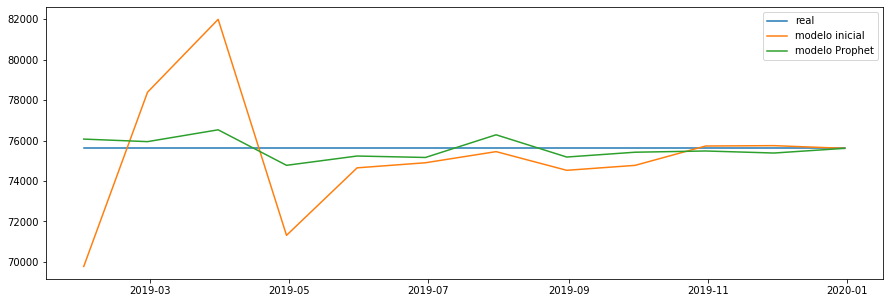

In [182]:
comparison = pd.read_table('comparison.csv',sep=';',decimal = ',') #, index_col=0)
comparison['ds'] = pd.to_datetime(comparison['ds'], format = '%Y-%m-%d')
comparison=comparison[comparison['ds'].dt.year == 2019]
fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
ax_aux.plot(comparison['ds'],comparison['real'],label='real')
ax_aux.plot(comparison['ds'],comparison['base'],label='modelo inicial')
ax_aux.plot(comparison['ds'],comparison['prophet'],label='modelo Prophet')
ax_aux.legend(loc='best')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


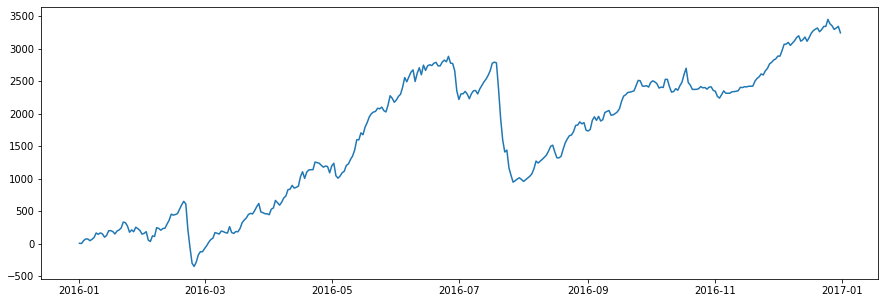

In [48]:
año_estudio=2016
mes_estudio=1
dia_estudio=1
fecha_estudio=pd.Timestamp(año_estudio, mes_estudio, dia_estudio)

datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col = 0)
datos.index = pd.to_datetime(datos.index, format = '%d/%m/%Y')

datos_orig = datos.copy()
datos_orig['ds'] = datos_orig.index
datos_orig = pd.DataFrame(datos_orig[['ds', 'TOTALES']])
datos_orig.columns = ['ds','y']

data = datos.copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

m, forecast, total_ph = modelo_TFM(data,fecha_estudio,True,91,6)

serie_calc = forecast  [forecast  ['ds'].dt.year == año_estudio].reset_index()[['ds', 'yhat']].copy()
serie_calc.rename(columns = {'yhat':'y_calc'}, inplace = True)
serie_real = datos_orig[datos_orig['ds'].dt.year == año_estudio].reset_index()[['ds', 'y']].copy()
serie_real.rename(columns = {'y':'y_real'}, inplace = True)
calculo = serie_calc.merge(serie_real)
calculo['diferencia'] = calculo['y_calc']-calculo['y_real']
calculo['acumulado'] = calculo['diferencia'].cumsum()
calculo_A2 = calculo.copy
fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
ax_aux.plot(calculo['ds'],calculo['acumulado'])

In [178]:
def modelo_optim(periodo, furier, modo):
    m, forecast, total_ph = modelo_TFM(data,fecha_estudio,True,periodo,furier, modo)
    display(total_ph)
    serie_calc = forecast  [forecast  ['ds'].dt.year == año_estudio].reset_index()[['ds', 'yhat']].copy()
    serie_calc.rename(columns = {'yhat':'y_calc'}, inplace = True)
    serie_real = datos_orig[datos_orig['ds'].dt.year == año_estudio].reset_index()[['ds', 'y']].copy()
    serie_real.rename(columns = {'y':'y_real'}, inplace = True)
    calculo = serie_calc.merge(serie_real)
    calculo['diferencia'] = calculo['y_calc']-calculo['y_real']
    calculo['acumulado'] = calculo['diferencia'].cumsum()
    return calculo

In [179]:
fecha_estudio = pd.Timestamp('2015-05-01')
modelo_optim([91,182],[5,2],['additive','additive'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


59889.51

,ds,y_calc,y_real,diferencia,acumulado
0,2016-01-01,0.711795,0.0,0.711795,0.711795
1,2016-01-02,64.017481,98.0,-33.982519,-33.270724
2,2016-01-03,68.513402,49.0,19.513402,-13.757322
3,2016-01-04,34.392601,47.5,-13.107399,-26.864720
4,2016-01-05,30.564600,50.0,-19.435400,-46.300121
...,...,...,...,...,...
361,2016-12-27,101.201534,135.5,-34.298466,2519.820335
362,2016-12-28,103.612234,163.5,-59.887766,2459.932569
363,2016-12-29,100.582184,84.5,16.082184,2476.014753
364,2016-12-30,128.455879,113.0,15.455879,2491.470632


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


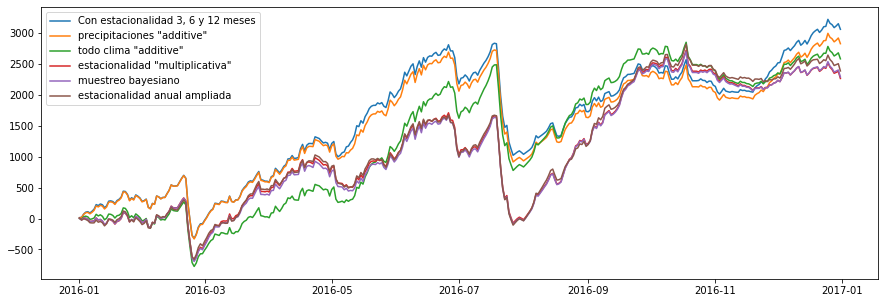

In [114]:
# calculo_A1 = modelo_optim ([91],    [2]  ,['additive'])
# calculo_A2 = modelo_optim ([182],   [2] ,['additive'] )
# calculo_A3 = modelo_optim ([91],    [5] ,['multiplicative'] )
# calculo_A4 = modelo_optim ([182],   [5] ,['multiplicative'] )
# calculo_A5 = modelo_optim ([91,182],[5,2],['additive','additive'])
# calculo_A6 = modelo_optim ([91,182],[5,2],['multiplicative','additive'])
# calculo_A7 = modelo_optim ([91,182],[5,2],['additive','multiplicative'])
# calculo_A8 = modelo_optim ([91,182],[5,2],['multiplicative','multiplicative'])
# calculo_A9 = modelo_optim ([270],[2])
# calculo_A10 = modelo_optim([300],[2])
# calculo_A11 = modelo_optim([330],[2])
# calculo_A12 = modelo_optim([360],[2])
# calculo_A13 = modelo_optim([91,182],[5,2],['additive','additive'])
# calculo_A14 = modelo_optim([91,182],[5,2],['additive','additive'])
# calculo_A15 = modelo_optim([91,182],[5,2],['additive','additive'])
# calculo_A16 = modelo_optim([91,182],[5,2],['additive','additive'])
calculo_A17 = modelo_optim([91,182],[5,2],['additive','additive'])
fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
# ax_aux.plot(calculo_A1['ds'],calculo_A1['acumulado'],label='A1')
# ax_aux.plot(calculo_A2['ds'],calculo_A2['acumulado'],label='A2')
# ax_aux.plot(calculo_A3['ds'],calculo_A3['acumulado'],label='A3')
# ax_aux.plot(calculo_A4['ds'],calculo_A4['acumulado'],label='A4')
ax_aux.plot(calculo_A5['ds'],calculo_A5['acumulado'],label='Con estacionalidad 3, 6 y 12 meses')
# ax_aux.plot(calculo_A6['ds'],calculo_A6['acumulado'],label='A6')
# ax_aux.plot(calculo_A7['ds'],calculo_A7['acumulado'],label='A7')
# ax_aux.plot(calculo_A8['ds'],calculo_A8['acumulado'],label='A8')
# ax_aux.plot(calculo_A9['ds'],calculo_A9['acumulado'],label='A9')
# ax_aux.plot(calculo_A10['ds'],calculo_A10['acumulado'],label='A10')
# ax_aux.plot(calculo_A11['ds'],calculo_A11['acumulado'],label='A11')
# ax_aux.plot(calculo_A12['ds'],calculo_A12['acumulado'],label='A12')
ax_aux.plot(calculo_A13['ds'],calculo_A13['acumulado'],label='precipitaciones "additive"')
ax_aux.plot(calculo_A14['ds'],calculo_A14['acumulado'],label='todo clima "additive"')
ax_aux.plot(calculo_A15['ds'],calculo_A15['acumulado'],label='estacionalidad "multiplicativa"')
ax_aux.plot(calculo_A16['ds'],calculo_A16['acumulado'],label='muestreo bayesiano')
ax_aux.plot(calculo_A17['ds'],calculo_A17['acumulado'],label='estacionalidad anual ampliada')
ax_aux.legend(loc='best')
# plt.legend(loc="upper left")
plt.show()
# seasonality_mode = 'multiplicative', yearly_seasonality=20) #mcmc_samples=300

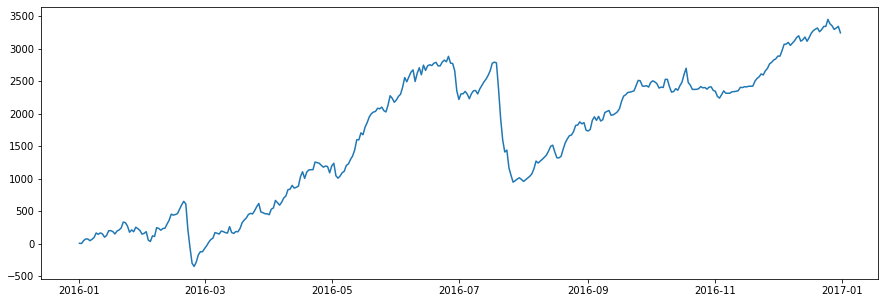

In [53]:
fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
ax_aux.plot(calculo_A1['ds'],calculo_A1['acumulado'])

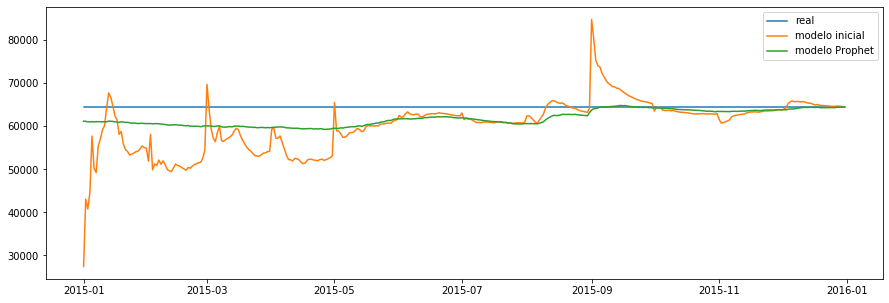

In [177]:
# comparison=[]
comparison_2 = pd.read_table('comparison_2.csv',sep=';',decimal = ',') #, index_col=0)
comparison_2['ds'] = pd.to_datetime(comparison_2['ds'], format = '%d/%m/%Y')
comparison_3=comparison_2[comparison_2['ds'].dt.year == 2015]
# comparison_3=comparison_3[comparison_3['ds'].dt.month == 8]
# comparison_3=comparison_2[comparison_2['ds'].str[:4]=='2016']
fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
ax_aux.plot(comparison_3['ds'],comparison_3['real'],label='real')
ax_aux.plot(comparison_3['ds'],comparison_3['base'],label='modelo inicial')
ax_aux.plot(comparison_3['ds'],comparison_3['prophet'],label='modelo Prophet')
ax_aux.legend(loc='best')
plt.show()

In [164]:
fecha = pd.Timestamp('2018-2-15')
datos = pd.read_table('Datos.csv',sep=';',decimal = ',', index_col = 0)
datos.index = pd.to_datetime(datos.index, format = '%d/%m/%Y')
data = datos[datos.index <= fecha].copy()
data['ds'] = data.index
data = pd.DataFrame(data[['ds', 'TOTALES']])
data.columns = ['ds','y']

m, forecast, total_ph = modelo_TFM(data,fecha)
base = modelo_inicial(data,fecha)
real = round(data[data['ds'].dt.year == fecha.year]['y'].sum(),2)

print("{valor:.2f}".format(valor = total_ph))
print("{valor:.2f}".format(valor = base))
print("{valor:.2f}".format(valor = real))


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


57155.76
55074.23
5179.00


61418.600000000006

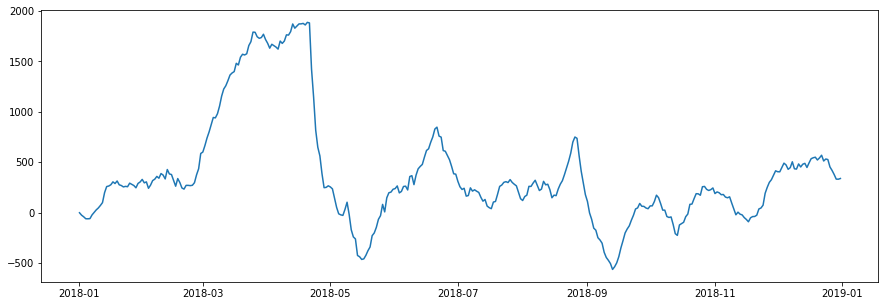

In [151]:
año_estudio=2018
mes_estudio=1
dia_estudio=1
fecha_estudio=pd.Timestamp(año_estudio, mes_estudio, dia_estudio)

ingresos_pred=forecast[forecast['ds']>fecha_estudio][['ds', 'yhat']].copy()
ingresos_pred.rename(columns = {'yhat':'y'}, inplace = True)
ingresos_real=datos_orig[datos_orig['ds']<=fecha_estudio][['ds', 'y']]
ingresos = pd.concat((ingresos_real, ingresos_pred))
ingresos['FECHA'] = pd.to_datetime(ingresos['ds'], format='%d/%m/%Y')
ingresos.index = ingresos['FECHA'] 
ingresos = pd.DataFrame(ingresos[['ds', 'y']])

calculo=ingresos[ingresos['ds'].dt.year==año_estudio].copy()
calculo['diferencia'] = ingresos[ingresos['ds'].dt.year==año_estudio]['y']-datos_orig[datos_orig['ds'].dt.year==año_estudio]['y']
calculo['acumulado'] = calculo['diferencia'].cumsum()

calculo_2 = ingresos[ingresos['ds'].dt.year==año_estudio].copy()
calculo_2['acumulado'] = ingresos['y'].cumsum()

calculo_3 = datos_orig[datos_orig['ds'].dt.year==año_estudio].copy()
calculo_3['acumulado'] = datos_orig['y'].cumsum()


fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
# ax_aux.plot(calculo['ds'],calculo['diferencia'])
ax_aux.plot(calculo['ds'],calculo['acumulado'])
# ax_aux.plot(calculo_2['ds'],calculo_2['acumulado'])
# ax_aux.plot(calculo_3['ds'],calculo_3['acumulado'])
# display(calculo_2)

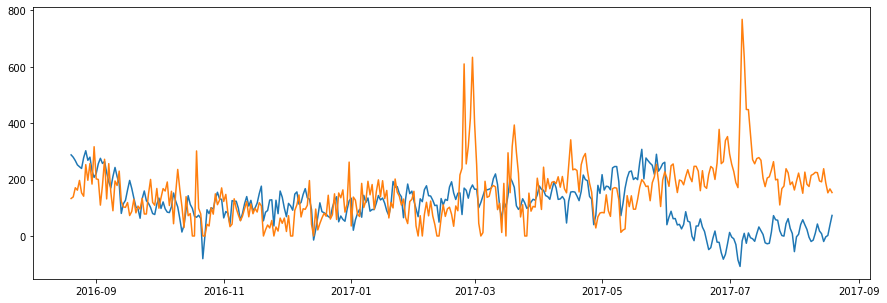

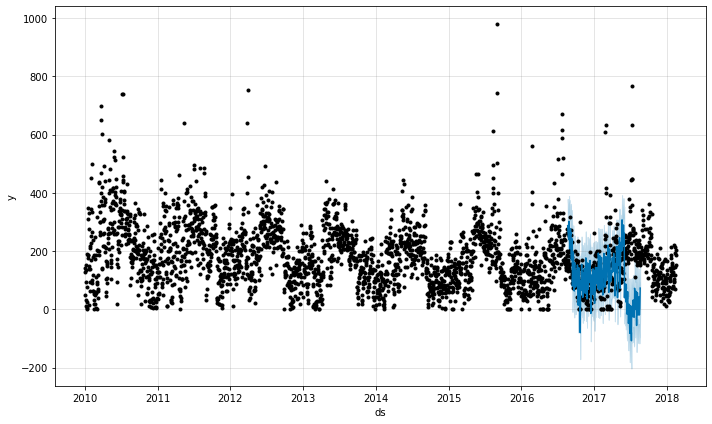

In [48]:
fig_aux, ax_aux = plt.subplots(facecolor='w', figsize=(15, 5)) 
cv = df_cv[df_cv['cutoff'] == pd.Timestamp('2016-08-19')]
# cv.loc[cv['yhat']<0, 'yhat'] = 0
# cv.loc[cv['yhat_lower']<0, 'yhat_lower'] = 0
# cv.loc[cv['yhat_upper']<0, 'yhat_upper'] = 0
ax_aux.plot(cv['ds'],cv['yhat'])
ax_aux.plot(cv['ds'],cv['y'])
fig1 = m.plot(cv)

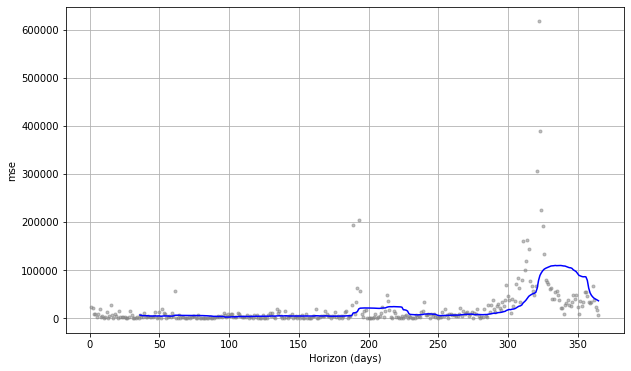

In [50]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv, metric='mse')

In [56]:
from fbprophet.diagnostics import performance_metrics
# performance_metrics?
df_p = performance_metrics(cv, rolling_window=0.9)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,328 days,18296.307814,135.263845,91.602445,0.517367,0.667683
1,329 days,18440.011798,135.794005,91.943794,0.517367,0.667683
2,330 days,18563.897770,136.249395,92.264169,0.517367,0.667683
3,331 days,18725.529893,136.841258,92.731692,0.517367,0.667683
4,332 days,18822.571116,137.195376,93.067063,0.517367,0.664634
